
## Assignment 5 - Ryan Timbrook
Apply bootstrap resampling to the auto price data as follows:

•	Compare the difference of the bootstrap resampled mean of the log price of autos grouped by 1) aspiration and 2) fuel type. Use both numerical and graphical methods for your comparison. Are these means different within a 95% confidence interval? How do your conclusions compare to the results you obtained using the t-test last week?

•	Compare the differences of the bootstrap resampled mean of the log price of the autos grouped by body style. You will need to do this pair wise; e.g. between each possible pairing of body styles. Use both numerical and graphical methods for your comparison. Which pairs of means are different within a 95% confidence interval? How do your conclusions compare to the results you obtained from the ANOVA and Tukey’s HSD analysis you performed last week?


In [2]:
#Clear session memory and consol
rm(list=ls())
cat('\014')
# Required Libraries
if(!require(dplyr)){install.packages("deplyr")}
if(!require(HistData)){install.packages("HistData")}
if(!require(resample)){install.packages("resample")}
if(!require(simpleboot)){install.packages("simpleboot")}
if(!require(repr)){install.packages("repr")}

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.3.2"Loading required package: resample
Warning message:
"package 'resample' was built under R version 3.3.2"Loading required package: simpleboot
Warning message:
"package 'simpleboot' was built under R version 3.3.2"Simple Bootstrap Routines (1.1-3 2008-04-30)
Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.2"

Utility functions for reading in data and plotting distributions

In [13]:
# Read Automobile price data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. 
  auto.price[complete.cases(auto.price), ]
}
## Function to plot t
plot.t <- function(a, b, aTitle, bTitle, nbins = 80, p = 0.05){
  cols = c(aTitle,bTitle)
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1])
  plot.hist(b, maxs, mins, cols = cols[2])
  par(mfrow = c(1, 1))
}
## Function to plot the difference of means
plot.hist <- function(a, maxs, mins, cols = 'difference of means', nbins = 80, p = 0.05) {
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols), xlab = cols)
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}
## Function to plot difference of means
plot.diff <- function(a, cols = 'difference of means', nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  plot.hist(a, maxs, mins, cols = cols[1])
}

In [14]:
# Read Auto data file
auto.price = read.auto()
# Add log normal of price as new attribute
auto.price$lnprice = log(auto.price$price)

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

1.) Compare the difference of the bootstrap resampled mean of the log price of autos.
-grouped by:
    a.) aspiration
    b.) fuel type


aspiration,count,mean.price,mean.lnprice,sd.price,sd.lnprice,max.price,max.lnprice,min.price,min.lnprice
std,159,12567.23,9.287064,8288.980,0.5140133,45400,10.72327,5118,8.540519
turbo,36,16254.81,9.625932,6179.616,0.3832251,31600,10.36091,7689,8.947546


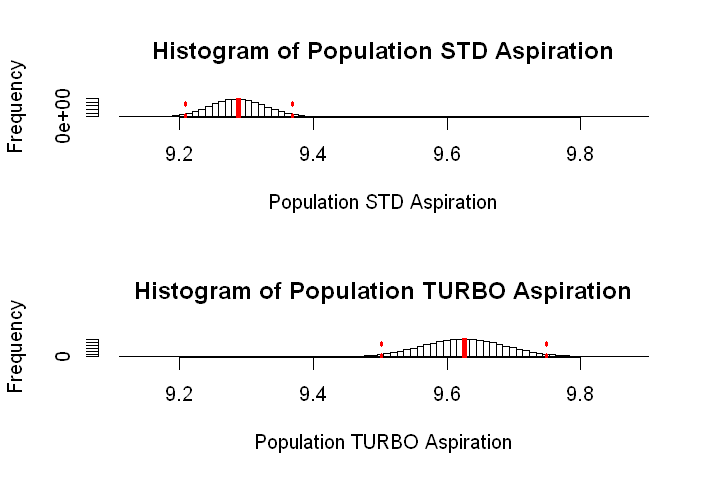

In [15]:
## a.) Auto Prices by Aspiration
autoPricesByAspiration = auto.price[,c('price','lnprice','aspiration')]
autoPricesByAspiration.group = autoPricesByAspiration %>% group_by(aspiration) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))
autoPricesByAspiration.group
# Bootstrap the mean of the std and of turbo cars
std.lnprices = autoPricesByAspiration[autoPricesByAspiration$aspiration == 'std',]$lnprice
mean.boot.std = one.boot(std.lnprices,mean,R=1000000)
turbo.lnprices = autoPricesByAspiration[autoPricesByAspiration$aspiration == 'turbo',]$lnprice
mean.boot.turbo = one.boot(turbo.lnprices,mean,R=1000000)

# Plot the Bootstrap mean of auto prices by STD Aspiration and TURBO Aspiration
plot.t(mean.boot.std$t,mean.boot.turbo$t,'Population STD Aspiration','Population TURBO Aspiration',nbins=80)

This shows us that the distribution of the bootstrap means do not overlap. Their differenc is significant.

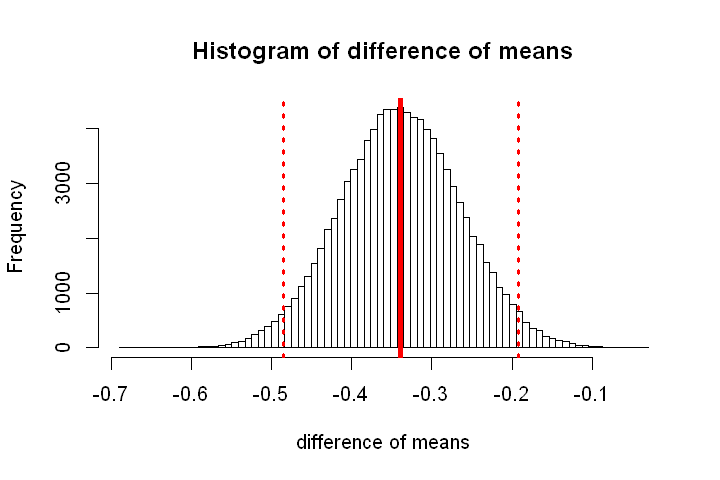

In [16]:
## Bootstrap the difference in means using two boot
options(repr.plot.width=6, repr.plot.height=4)

# Aspiration, std versus turbo
mean.two.boot.aspiration = two.boot(std.lnprices, turbo.lnprices, mean, R = 100000)
plot.diff(mean.two.boot.aspiration$t)

In [1]:
## b.) Auto Prices by Fuel Types
autoPricesByFuelType = auto.price[,c('price','lnprice','fuel.type')]
autoPricesByFuelType.group = autoPricesByFuelType %>% group_by(fuel.type) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))

# Bootstrap the mean of the gas and of diesal
gas.lnprices = autoPricesByFuelType[autoPricesByFuelType$fuel.type == 'gas',]$lnprice
mean.boot.gas = one.boot(gas.lnprices,mean,R=1000000)
diesel.lnprices = autoPricesByFuelType[autoPricesByFuelType$fuel.type == 'diesel',]$lnprice
mean.boot.diesel = one.boot(diesel.lnprices,mean,R=1000000)

# Plot the Bootstrap mean of auto prices by gas fuel type and diesel fuel type
plot.t(mean.boot.gas$t,mean.boot.diesel$t,'Population gas Fuel Type','Population diesel Fuel Type',nbins=80)

## Bootstrap the difference in means
options(repr.plot.width=6, repr.plot.height=4)

# Fuel Type, Gas versus Diesel
mean.two.boot.fueltype = two.boot(gas.lnprices, diesel.lnprices, mean, R = 100000)
plot.diff(mean.two.boot.fueltype$t)

ERROR: Error in eval(expr, envir, enclos): could not find function "%>%"


In [ ]:
## Is the bootstrapped distribution Normal?
options(repr.plot.width=6, repr.plot.height=6)
qqnorm(two.boot.mean$t, main = 'Quantiles of standard Normal vs. bookstrapped mean')


                                  Df Sum Sq Mean Sq F value   Pr(>F)    
autoPricesByBodyStyle$body.style   4   7.85  1.9615   8.788 1.57e-06 ***
Residuals                        190  42.41  0.2232                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
   aov(formula = autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)

Terms:
                autoPricesByBodyStyle$body.style Residuals
Sum of Squares                           7.84591  42.41013
Deg. of Freedom                                4       190

Residual standard error: 0.4724523
Estimated effects may be unbalanced


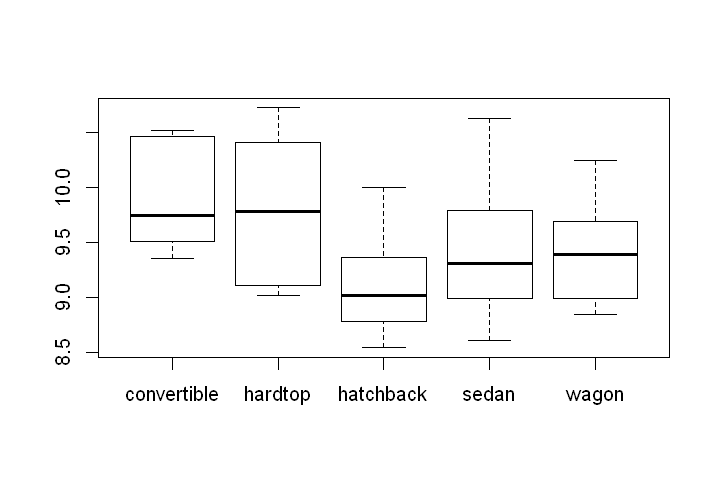

In [19]:
########################################################################################################
## 2.) Compare the differences of the bootstrap resampled mean of the log price of the autos grouped by body style
########################################################################################################

autoPricesByBodyStyle = auto.price[,c('price','lnprice','body.style')]
autoPricesByBodyStyle.group = autoPricesByBodyStyle %>% group_by(body.style) %>% 
  summarise(count=n(),mean.price = mean(price,na.rm=TRUE),mean.lnprice = mean(lnprice,na.rm=TRUE), sd.price = sd(price,na.rm=TRUE), sd.lnprice = sd(lnprice,na.rm=TRUE), 
            max.price = max(price), max.lnprice = max(lnprice), min.price=min(price), min.lnprice=min(lnprice))

# Boxplot the body style
boxplot(autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)

# ANOVA of Body Style to Log Normal auto price
bodyStyle_aov = aov(autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)
summary(bodyStyle_aov)
print(bodyStyle_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = autoPricesByBodyStyle$lnprice ~ autoPricesByBodyStyle$body.style)

$`autoPricesByBodyStyle$body.style`
                             diff         lwr         upr     p adj
hardtop-convertible   -0.09664988 -0.79938112  0.60608136 0.9955964
hatchback-convertible -0.78537118 -1.34130681 -0.22943556 0.0012903
sedan-convertible     -0.45193455 -0.99984087  0.09597177 0.1586910
wagon-convertible     -0.53101926 -1.12493556  0.06289704 0.1037126
hatchback-hardtop     -0.68872130 -1.17710344 -0.20033917 0.0013238
sedan-hardtop         -0.35528467 -0.83450698  0.12393764 0.2502185
wagon-hardtop         -0.43436938 -0.96558426  0.09684551 0.1654127
sedan-hatchback        0.33343663  0.12157052  0.54530274 0.0002276
wagon-hatchback        0.25435193 -0.05777382  0.56647767 0.1680903
wagon-sedan           -0.07908470 -0.37667401  0.21850460 0.9488191


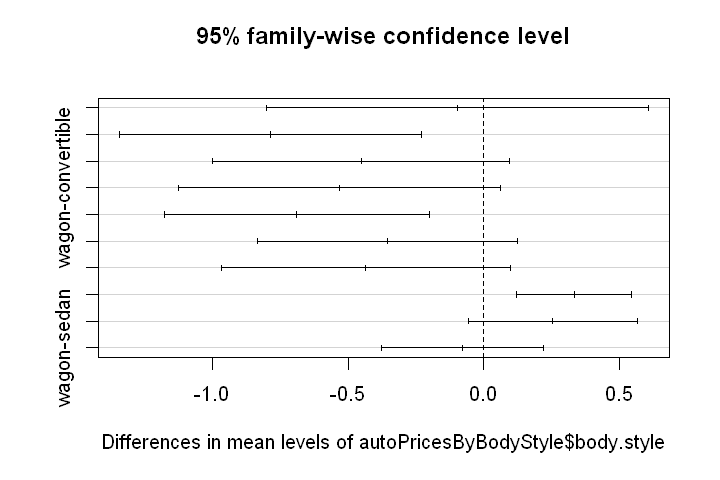

In [20]:
# Tukey ANOVA of Body Style Prices
bodyStyles_tuk = TukeyHSD(bodyStyle_aov)
# Print model data
bodyStyles_tuk
# Plot
plot(bodyStyles_tuk)

Body Style Bootstrap mean distrobutions:
-hardtop-convertible
-hatchback-convertible
-sedan-convertible
-wagon-convertible
-hatchback-hardtop
-sedan-hardtop
-wagon-hardtop
-sedan-hatchback
-wagon-hatchback
-wagon-sedan

In [21]:
# Bootstrap the mean of the hardtop and of convertable body styles
# Get the body types lnprices
hardtop.lnprices = autoPricesByBodyStyle[autoPricesByBodyStyle$body.style == 'hardtop',]$lnprice
convertible.lnprices = autoPricesByBodyStyle[autoPricesByBodyStyle$body.style == 'convertible',]$lnprice
hatchback.lnprices = autoPricesByBodyStyle[autoPricesByBodyStyle$body.style == 'hatchback',]$lnprice
sedan.lnprices = autoPricesByBodyStyle[autoPricesByBodyStyle$body.style == 'sedan',]$lnprice
wagon.lnprices = autoPricesByBodyStyle[autoPricesByBodyStyle$body.style == 'wagon',]$lnprice

# Get the body types mean boots
mean.boot.hardtop = one.boot(hardtop.lnprices,mean,R=1000000)
mean.boot.convertible = one.boot(convertible.lnprices,mean,R=1000000)
mean.boot.hatchback = one.boot(hatchback.lnprices,mean,R=1000000)
mean.boot.sedan = one.boot(sedan.lnprices,mean,R=1000000)
mean.boot.wagon = one.boot(wagon.lnprices,mean,R=1000000)

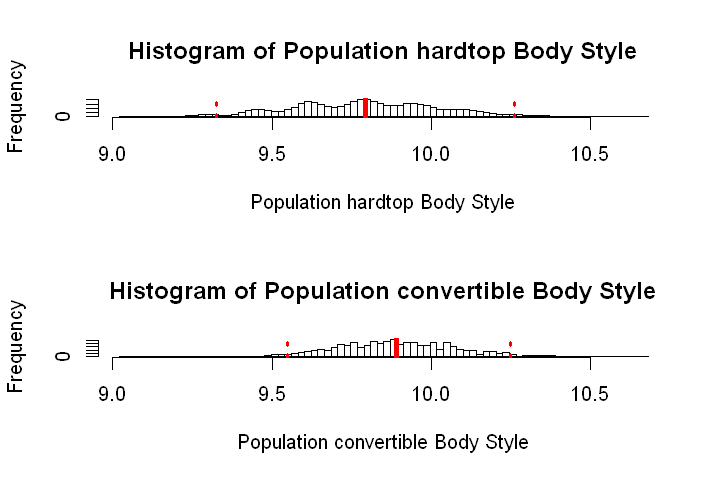

In [22]:
##### hardtop-convertible ####
plot.t(mean.boot.hardtop$t,mean.boot.convertible$t,'Population hardtop Body Style','Population convertible Body Style',nbins=80)

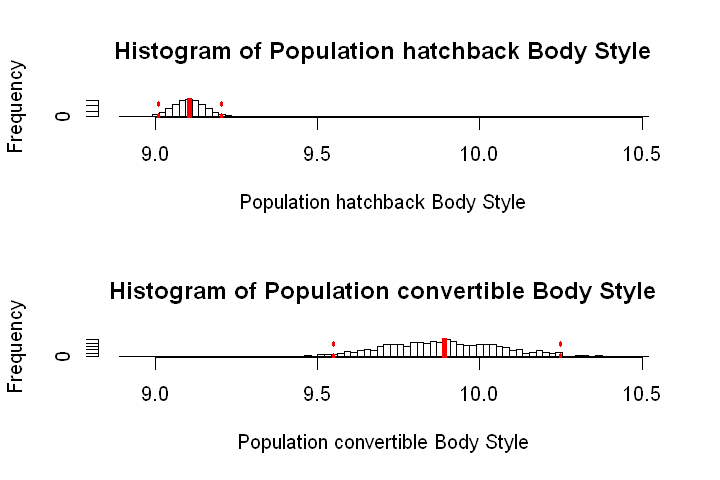

In [23]:
##### hatchback-convertible ####
plot.t(mean.boot.hatchback$t,mean.boot.convertible$t,'Population hatchback Body Style','Population convertible Body Style',nbins=80)

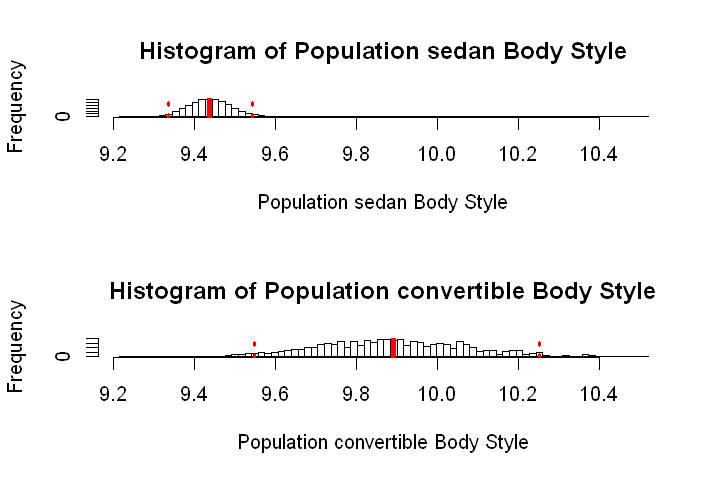

In [24]:
##### sedan-convertible ####
plot.t(mean.boot.sedan$t,mean.boot.convertible$t,'Population sedan Body Style','Population convertible Body Style',nbins=80)


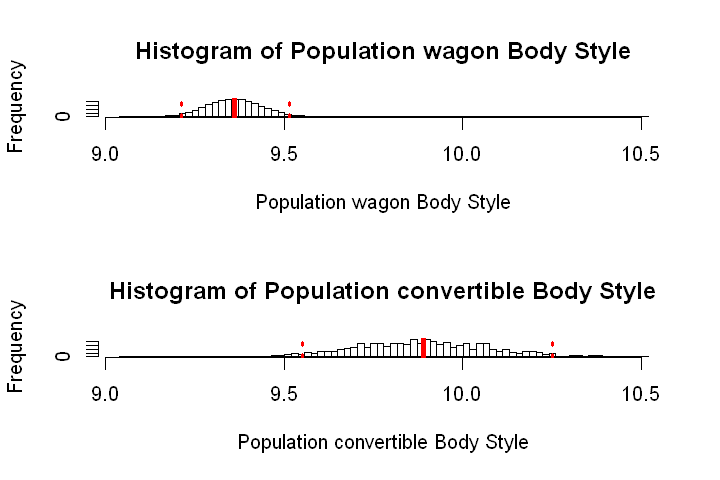

In [25]:
##### wagon-convertible ####
plot.t(mean.boot.wagon$t,mean.boot.convertible$t,'Population wagon Body Style','Population convertible Body Style',nbins=80)

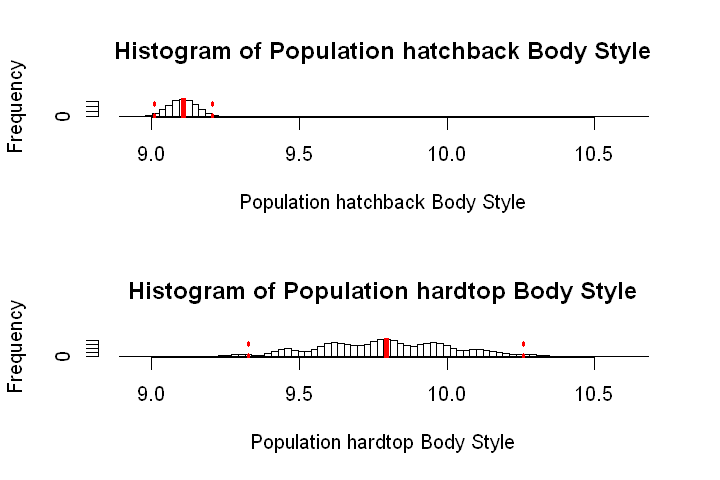

In [26]:
##### hatchback-hardtop ####
plot.t(mean.boot.hatchback$t,mean.boot.hardtop$t,'Population hatchback Body Style','Population hardtop Body Style',nbins=80)

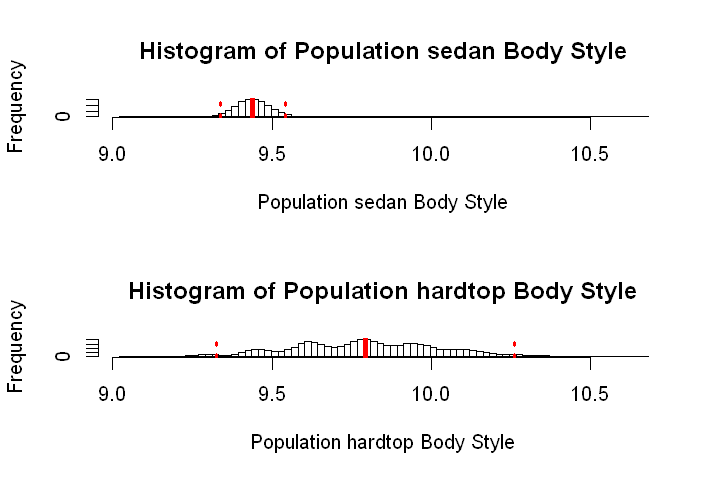

In [27]:
##### sedan-hardtop ####
plot.t(mean.boot.sedan$t,mean.boot.hardtop$t,'Population sedan Body Style','Population hardtop Body Style',nbins=80)

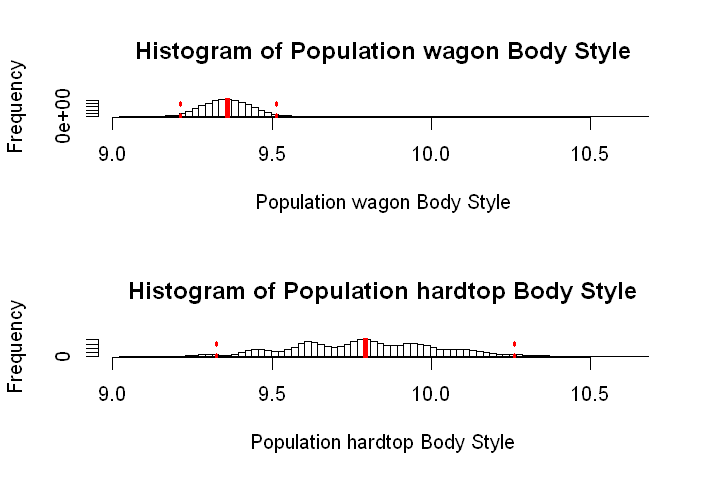

In [28]:
##### wagon-hardtop ####
plot.t(mean.boot.wagon$t,mean.boot.hardtop$t,'Population wagon Body Style','Population hardtop Body Style',nbins=80)

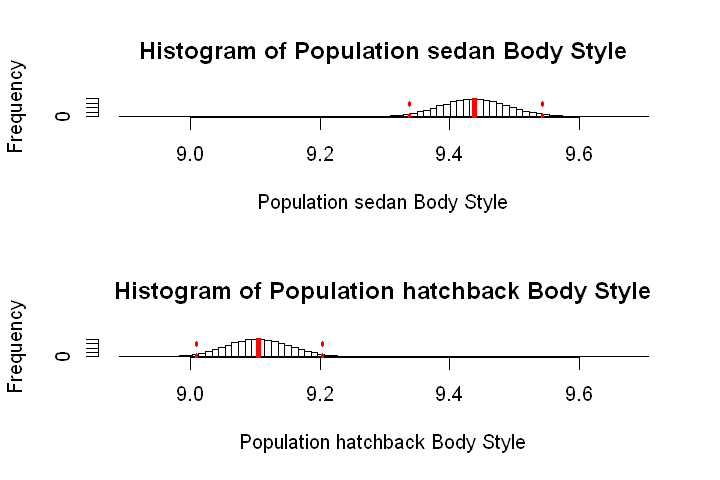

In [29]:
##### sedan-hatchback ####
plot.t(mean.boot.sedan$t,mean.boot.hatchback$t,'Population sedan Body Style','Population hatchback Body Style',nbins=80)

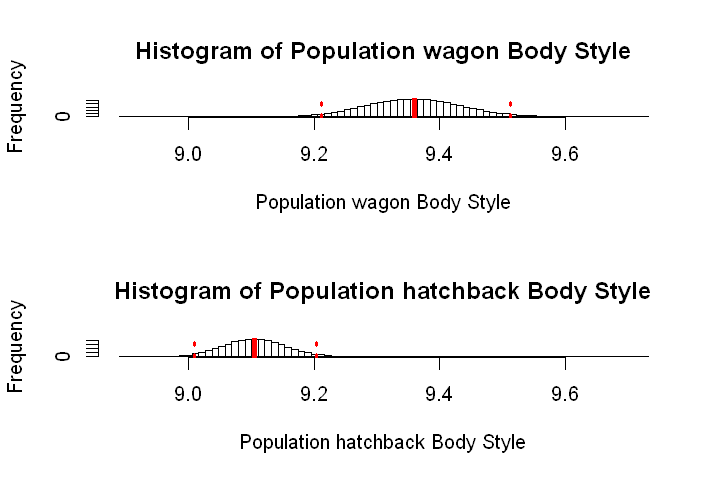

In [30]:
##### wagon-hatchback ####
plot.t(mean.boot.wagon$t,mean.boot.hatchback$t,'Population wagon Body Style','Population hatchback Body Style',nbins=80)

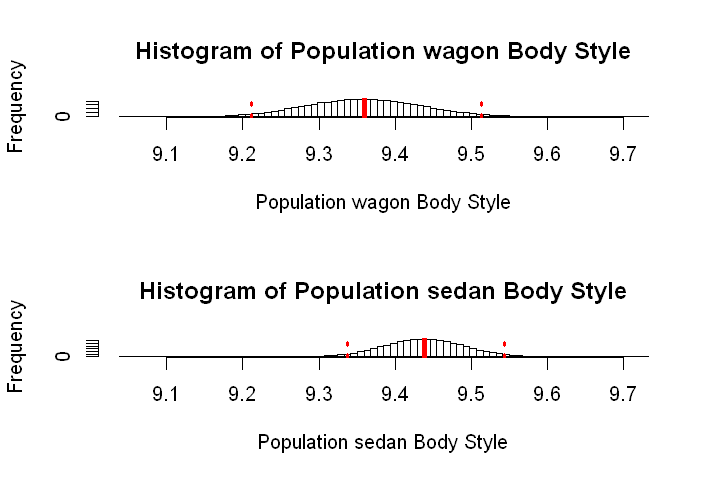

In [31]:
##### wagon-sedan ####
plot.t(mean.boot.wagon$t,mean.boot.sedan$t,'Population wagon Body Style','Population sedan Body Style',nbins=80)
